In [1]:
import HNLCalc
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

In [2]:
hnl = HNLCalc.HeavyNeutralLepton(ve=1, vmu=0, vtau=0)
utility = HNLCalc.Utility()
production = HNLCalc.Production()
masses =  np.logspace(-1,1, 401)

## HNL Decay

In [3]:
hnl.get_br_and_ctau(mpts = masses)

In [4]:
print(f"Active Decay Modes:\n")
for channel in hnl.modes_active.keys():
    string = ""
    if channel not in ['nuqq','lud']:   
        for mode in hnl.modes_active[channel]:
            string += f" {mode},"
        print(f"{channel}: "+string[:-1]+"\n")        

Active Decay Modes:

null:  ('nu', 'e', 'anti_e'), ('nu', 'mu', 'anti_mu'), ('nu', 'tau', 'anti_tau')

llnu:  ('e', 'anti_mu', 'nu'), ('mu', 'anti_e', 'nu'), ('e', 'anti_tau', 'nu'), ('tau', 'anti_e', 'nu')

nu3:  ('nu', 'nu', 'nu')

nuP:  ('nu', 'pi0'), ('nu', 'eta'), ('nu', 'etap')

lP:  ('e', 'pi+'), ('anti_e', 'anti_pi+'), ('e', 'K+'), ('anti_e', 'anti_K+'), ('e', 'D+'), ('anti_e', 'anti_D+'), ('e', 'Ds+'), ('anti_e', 'anti_Ds+')

nuV:  ('nu', 'rho0'), ('nu', 'omega'), ('nu', 'phi')

lV:  ('e', 'rho+'), ('anti_e', 'anti_rho+'), ('e', 'K+star'), ('anti_e', 'anti_K+star')

lhad:  ('e', 'had'), ('anti_e', 'had')

nuhad:  ('nu', 'had')



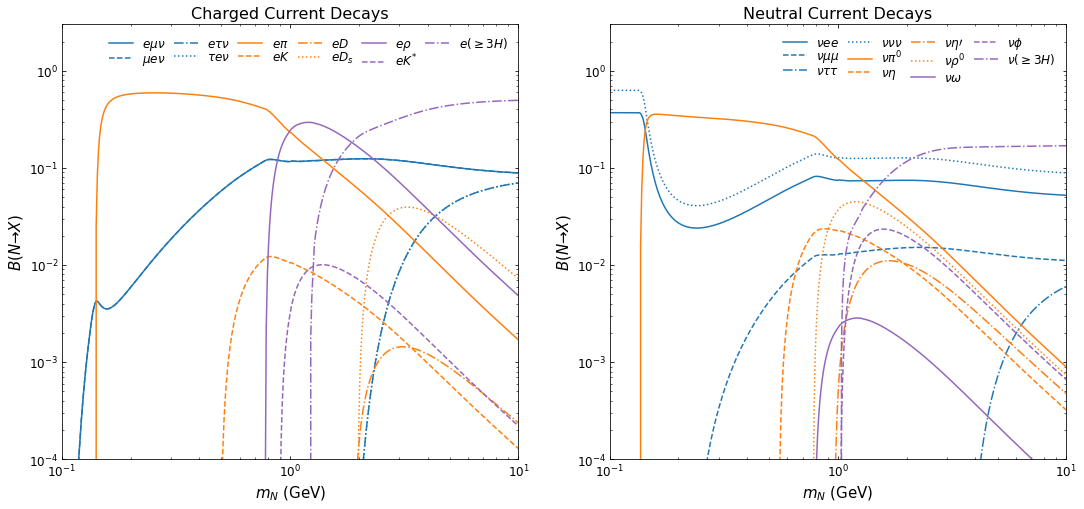

In [5]:
fig,(ax,ax1) = plt.subplots(1,2)

custom_cycler = (cycler(color=['tab:blue','tab:orange','tab:purple', 'y', 'r','green','c'])* 
                 cycler(ls=['-', '--', '-.', 'dotted']))

ax.set_prop_cycle(custom_cycler)
ax1.set_prop_cycle(custom_cycler)

fig.set_size_inches(18,8, forward=True)

ax.set_title(r"Charged Current Decays",fontsize = 16)
ax1.set_title(r"Neutral Current Decays",fontsize = 16)

for a in [ax,ax1]:
    
    a.set(xscale = 'log', yscale = 'log',xlim=(1e-1,1e1),ylim = (1e-4,3))
   
    a.tick_params(axis='both', which='major',direction='in',top=True,right=True)
    
    a.tick_params(axis='both', which='minor',direction='in',top=True,right=True)
    
    a.set_xlabel(r"$m_N$ (GeV)",fontsize=15)
    a.set_ylabel(r"$B(N\to X)$",fontsize=15)
    a.tick_params(axis='x', labelsize=12)
    a.tick_params(axis='y', labelsize=12)
    
for channel in ['null','nu3','nuP','nuV','nuhad']:
    for mode in hnl.modes_active[channel]:
        label = r"" 
        for p in mode: label += HNLCalc.plot_labels_neut[p]
        ax1.plot(masses,hnl.model_brs[channel][mode], label =label)


for channel in ['llnu','lP','lV','lhad']:
    for mode in hnl.modes_active[channel]:
        if 'anti_' not in mode[0]:
            label = r"" 
            for p in mode: label += HNLCalc.plot_labels_neut[p]
            ax.plot(masses,2*np.array(hnl.model_brs[channel][mode]), label =label)

ax.legend(prop={'size': 12},loc='upper right',frameon=False,ncol=6,labelspacing=0,columnspacing = .65)
ax1.legend(prop={'size': 12},loc='upper right',frameon=False,ncol=4,labelspacing=0,columnspacing = .65)



fig.savefig(f'HNL Decay Br.pdf',format='pdf',bbox_inches='tight')

['3body_pseudo_421_-321_-11', '421', '-321', '-11', '0.011673284096303978* coupling**2 *(((0.747/(1-q**2/1.96835**2)-0.747/(1-q**2/2.1122**2))*(1.86484**2-0.49367700000000003**2)/q**2)**2*(q**2*(mass**2+0.0005109989461**2)-(mass**2-0.0005109989461**2)**2)+(2*(0.747/(1-q**2/2.1122**2))*((0.747/(1-q**2/1.96835**2)-0.747/(1-q**2/2.1122**2))*(1.86484**2-0.49367700000000003**2)/q**2)*mass**2*(2*1.86484**2-2*0.49367700000000003**2-4*energy*1.86484-0.0005109989461**2+mass**2+q**2)+(2*(0.747/(1-q**2/2.1122**2))*((0.747/(1-q**2/1.96835**2)-0.747/(1-q**2/2.1122**2))*(1.86484**2-0.49367700000000003**2)/q**2)*0.0005109989461**2*(4*energy*1.86484+ 0.0005109989461**2-mass**2-q**2)))+((0.747/(1-q**2/2.1122**2))**2*(4*energy*1.86484+0.0005109989461**2-mass**2-q**2)*(2*1.86484**2-2*0.49367700000000003**2-4*energy*1.86484-0.0005109989461**2+mass**2+q**2)+-(0.747/(1-q**2/2.1122**2))**2*(2*1.86484**2+2*0.49367700000000003**2-q**2)*(q**2-mass**2-0.0005109989461**2)))', 'dq2dE', '$D^0 \\to K^- + e^+ + N$']


/var/folders/7n/xcfzp7ld2x3cgybk310trqrw0000gn/T/ipykernel_74688/4234234458.py:81: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,10)


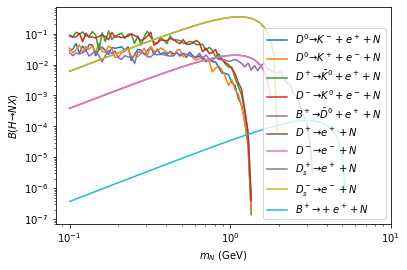

In [17]:
nsample = 10
coupling = 1
#masses = np.linspace(.1,10,100)
masses = np.logspace(-1,1,100)
self=utility
production_channels_3body = hnl.get_channels_3body()[0:5]
production_channels_2body = hnl.get_channels_2body()[0:5]
production_channels = production_channels_3body + production_channels_2body

for m in range(len(production_channels)):
    production_channel = production_channels[m]
    if '2body' in production_channel[0]:
        mode = production_channel[0]
        brs = []
        masses_plt = []
        for n in range(len(masses)):
            #pid0 is parent meson pid1 is daughter meson pid2 is lepton pid3 is HNL
            mode = production_channel[0]
            pid0 = production_channel[1]
            pid1 = production_channel[2]
            m0 = utility.masses(pid0)
            m1 = utility.masses(pid1)
            m2=masses[n]
            if m0>=m1+m2:
                print(m0>=m1+m2)
                br = production_channel[3]
                label = production_channel[4]
                print(production_channel)
                p, weights = production.decay_in_restframe_2body(br,coupling, m0, m1, m2, nsample)
                brs.append(sum(weights))
                masses_plt.append(masses[n])
        print(brs)

    if '3body' in production_channel[0]:
        mode = production_channel[0]
        brs = []
        masses_plt = []
        for n in range(len(masses)):
            integration = production_channel[5]
            #pid0 is parent meson pid1 is daughter meson pid2 is lepton pid3 is HNL
            if integration == 'dq2dE':
                pid0 = production_channel[1]
                pid1 = production_channel[2]
                pid2 = production_channel[3]
                m0 = utility.masses(pid0)
                m1 = utility.masses(pid1)
                m2 = utility.masses(pid2)
                m3=masses[n]
                if m0>=m1+m2+m3:
                    br = production_channel[4]
                    label = production_channel[6]
                    print(production_channel)
                    p, weights = production.decay_in_restframe_3body_dq2dE(br, coupling, m0, m1, m2, m3, nsample)
                    brs.append(sum(weights))
                    masses_plt.append(masses[n])
            #pid0 is tau, pid1 is produced lepton and pid2 is the neutrino
            if integration == 'dE':
                pid0 = production_channel[1]
                pid1 = production_channel[2]
                pid2 = production_channel[3]
                m0 = utility.masses(pid0)
                m1 = utility.masses(pid1)
                m2 = utility.masses(pid2)
                m3=masses[n]
                if m0>=m1+m2+m3:
                    mode = production_channel[0]
                    br = production_channel[4]
                    label = production_channel[6]
                    print(production_channel)
                    p, weights = production.decay_in_restframe_3body_dE(br, coupling, m0, m1, m2, m3, nsample)
                    brs.append(sum(weights))
                    masses_plt.append(masses[n])
    if len(brs)!=0:      #check this
        plt.plot(masses_plt,brs,label = label)



plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlim(0,10)
plt.ylabel(r'$B(H \to N X)$')
plt.xlabel(r'$m_N$ (GeV)')
plt.show()
